This is an analysis in reponse to " Is there is a way to see statistics around our organic followers by platform? Knowing who are followers are will help us create better and more relevant content."


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
source_data = {
    'sample':{
        'meta':{
            'age_ranges': ['18-24', '25-34', '35-44', '45-54', '55-64', '65+'],
            'female':[0.028,0.166,0.129,0.15,0.124,0.059],
            'male':[0.018,0.132,0.073,0.059,0.041,0.021]
        },
        'linkedin':{
            'age_ranges':['18-24', '25-34', '35-54', '55+'],
            'female':[0.0454935622317597, 0.197424892703863, 0.231759656652361, 0.055793991416309],
            'male':[0.0377682403433476, 0.163090128755365, 0.197424892703863, 0.0712446351931331]
        },
        'twitter':{
            'age_ranges':['18-24', '25-34', '35-49', '50-54', '55+'],
            'female':[0.0741839762611276, 0.112759643916914, 0.13353115727003, 0.0415430267062315, 0.0801186943620178],
            'male':[0.086053412462908, 0.15727002967359, 0.189910979228487, 0.0504451038575668, 0.0741839762611276]
        }
        },
    'platform_benchmark':{
        'meta':{
            'age_ranges': ['18-24', '25-34', '35-44', '45-54', '55-64', '65+'],
            'female':[0.10629535202981, 0.124141988625221, 0.0972739752892724, 0.0757011178662483, 0.0649146891547362, 0.073347715238282],
            'male':[0.0874681310060796, 0.12002353402628, 0.0921749362620122, 0.0645224553834085, 0.0492253383016278, 0.0449107668170229]
        },
        'linkedin':{
            'age_ranges':['18-24', '25-34', '35-54', '55+'],
            'female':[0.0941993058998513, 0.242935052057511, 0.133862171541894, 0.0267724343083788],
            'male':[0.0842835894893406, 0.237977193852256, 0.138820029747149, 0.0411502231036192]
        },
        'twitter':{
            'age_ranges':['18-24', '25-34', '35-49', '50-54', '55+'],
            'female':[0.133333333333333, 0.119160104986877, 0.0713910761154856, 0.0152230971128609, 0.0293963254593176],
            'male':[0.203149606299213, 0.226246719160105, 0.138057742782152, 0.0236220472440945, 0.0404199475065617]
        }
        },
    'chart_config':{
        'meta':{
            'ticks':[-15,-10,-5,0,5,10,15],
            'labels':['15%',"10%","5%", "", "5%","10%","15%"]
        },
        'linkedin':{
            'ticks':[-20,-15,-10,-5,0,5,10,15,20],
            'labels':['20%','15%',"10%","5%", "", "5%","10%","15%", "20%"]
        },
        'twitter':{
            'ticks':[-20,-15,-10,-5,0,5,10,15,20],
            'labels':['-20%','15%',"10%","5%", "", "5%","10%","15%","20%"]
        }
    }
}

In [3]:
def plot_follower_breakdown(source_data=None, platform = None):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

    # First Breakdown plot
    chart_1 = pd.DataFrame({
        'ages':source_data['sample'][platform]['age_ranges'],
        'male':[x *-100 for x in source_data['sample'][platform]['male']],
        'female':[x *100 for x in source_data['sample'][platform]['female']]
    })

    ax1 = axes[0,0]
    sns.barplot(x='male', y='ages', data=chart_1, color='b', ax=ax1)
    sns.barplot(x='female', y='ages', data=chart_1, color='g', ax=ax1)
    ax1.set_title(f'Follower Breakdown for {next(iter(source_data.keys()))}')
    ax1.set_xticks(ticks=source_data['chart_config'][platform]['ticks'])
    ax1.set_xticklabels(labels = source_data['chart_config'][platform]['labels'])
    ax1.set_xlabel("Male  |  Female")
    

    # Second Breakdown plot for benchmark

    chart_2 = pd.DataFrame({
        'ages':source_data['platform_benchmark'][platform]['age_ranges'],
        'male':[x *-100 for x in source_data['platform_benchmark'][platform]['male']],
        'female':[x *100 for x in source_data['platform_benchmark'][platform]['female']]
    })
    ax2 = axes[0,1]
    sns.barplot(x='male', y='ages', data=chart_2, color='b', ax=ax2)
    sns.barplot(x='female', y='ages', data=chart_2, color='g', ax=ax2)
    ax2.set_title(f'Follower Breakdown for {platform}')
    ax2.set_xticks(ticks=source_data['chart_config'][platform]['ticks'])
    ax2.set_xticklabels(labels = source_data['chart_config'][platform]['labels'])
    ax2.set_ylabel("")
    ax2.set_xlabel("Male  |  Female")
    
    # Third chart - Absolute differences

    male_diff = [(x - y)*100 for x,y in zip(source_data['sample'][platform]['male'],source_data['platform_benchmark'][platform]['male'] )]
    female_diff = [(x - y)*100 for x,y in zip(source_data['sample'][platform]['female'],source_data['platform_benchmark'][platform]['female'])]
    chart_3 = pd.DataFrame({
        'ages':source_data['sample'][platform]['age_ranges'] * 2,
        'values':male_diff + female_diff,
        'genders': ['male' for x in range(len(source_data['sample'][platform]['male']))] + ['female' for x in range(len(source_data['sample'][platform]['female']))]
    })
    
    ax3 = axes[1,0]
    sns.barplot(y='values', x='ages', data=chart_3, hue='genders', ax=ax3, orient='v', dodge=True, palette={"male": "b", "female": "g"})
    ax3.get_legend().remove()
    ax3.yaxis.set_major_formatter('{x:1.0f}%')
    ax3.set_title('Absolute Difference')
    ax3.set_ylabel('% Difference')
    
    
    # Fourth chart showing relative values

    male_diff = [(x / y - 1)*100 for x,y in zip(source_data['sample'][platform]['male'],source_data['platform_benchmark'][platform]['male'] )]
    female_diff = [(x / y - 1)*100 for x,y in zip(source_data['sample'][platform]['female'],source_data['platform_benchmark'][platform]['female'])]
    chart_4 = pd.DataFrame({
        'ages':source_data['sample'][platform]['age_ranges'] * 2,
        'values':male_diff + female_diff,
        'genders': ['male' for x in range(len(source_data['sample'][platform]['male']))] + ['female' for x in range(len(source_data['sample'][platform]['female']))]
    })
    
    ax4 = axes[1,1]
    sns.barplot(y='values', x='ages', data=chart_4, hue='genders', ax=ax4, orient='v', dodge=True, palette={"male": "b", "female": "g"})
    ax4.get_legend().remove()
    ax4.yaxis.set_major_formatter('{x:1.0f}%')
    ax4.set_title('Relative Difference')
    ax4.set_ylabel('')


    
    plt.show()

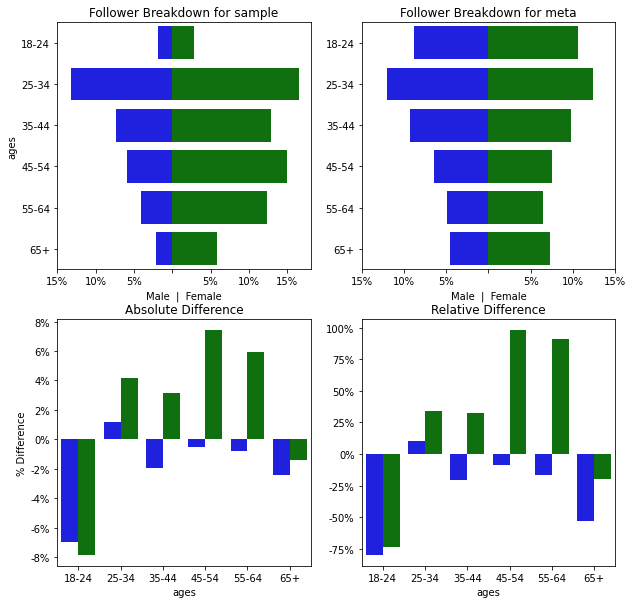

In [4]:
plot_follower_breakdown(source_data,'meta')

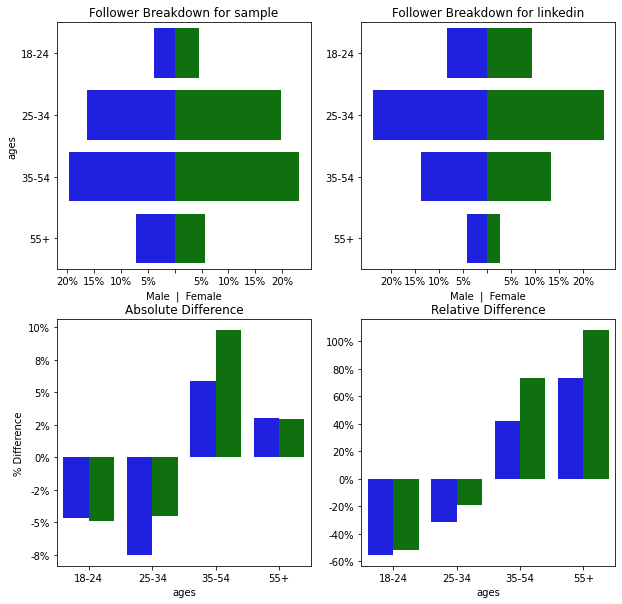

In [5]:
plot_follower_breakdown(source_data,'linkedin')

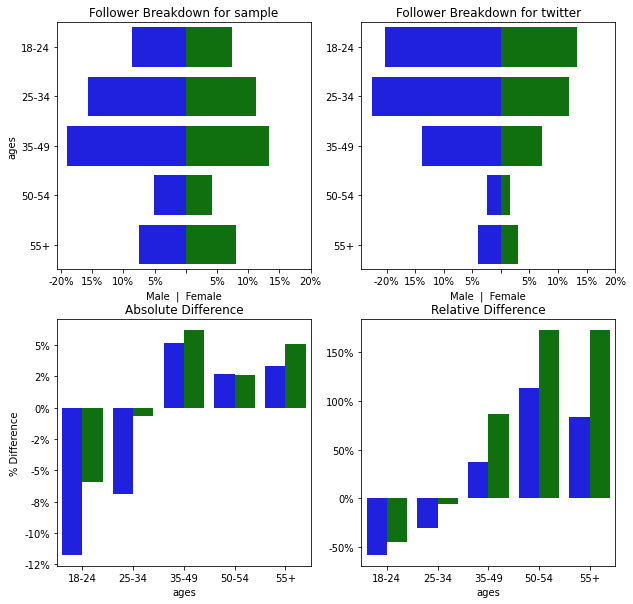

In [6]:
plot_follower_breakdown(source_data,'twitter')